### Imports

In [109]:
import os
import math

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [44]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

### Correlation

In [209]:
def merge_to_base(df_base, df_add):
    df_add = df_add.drop(['county','state'], axis=1)
    df_base = df_base.merge(df_add, how='inner', on='fips')
    return df_base

In [310]:
def draw_correlation_heatmap(df_combined):
    df_correlate = df_combined.drop(['fips','county','state'], axis=1)
    df_correlate = df_correlate.dropna()
    sns.set(font_scale=1)
    plt.subplots(figsize=(15,13))
    sns.heatmap(df_correlate.corr(), cmap='Spectral', annot=True)

### Path

In [311]:
path_input = '00_data_input'
path_temp = '01_data_temp'
path_inter = '02_data_intermediate'
path_output = '03_data_output'
path_atlas = os.path.join(path_input, 'food_atlas.xls')

### Base Health Data - Obesity

In [312]:
df_health = pd.read_csv(os.path.join(path_output, 'health_data.csv'))
df_health = df_health.drop(['PCT_obese_adults_2008','PCT_diabetes_adults_2008'], axis=1)
df_health.head()

fips   county state  PCT_obese_adults_2013  PCT_diabetes_adults_2013
0  1001  Autauga    AL                   34.1                      13.0
1  1003  Baldwin    AL                   27.4                      10.4
2  1005  Barbour    AL                   44.4                      18.4
3  1007     Bibb    AL                   40.3                      14.8
4  1009   Blount    AL                   34.6                      14.1

### Ethnical Groups

In [313]:
df_ethnical = pd.read_csv(os.path.join(path_output, 'ethnical_data.csv'))
df_ethnical.head()

fips   county state  PCT_white_2010  PCT_black_2010  PCT_hispanic_2010  \
0  1001  Autauga    AL       77.246156       17.582599           2.400542   
1  1003  Baldwin    AL       83.504787        9.308425           4.384824   
2  1005  Barbour    AL       46.753105       46.691190           5.051535   
3  1007     Bibb    AL       75.020729       21.924504           1.771765   
4  1009   Blount    AL       88.887338        1.263040           8.070200   

   PCT_asian_2010  PCT_native_2010  PCT_pacific_2010  
0        0.855766         0.397647          0.040314  
1        0.735193         0.628755          0.043343  
2        0.389700         0.218524          0.087409  
3        0.096007         0.279293          0.030548  
4        0.200621         0.497191          0.031402

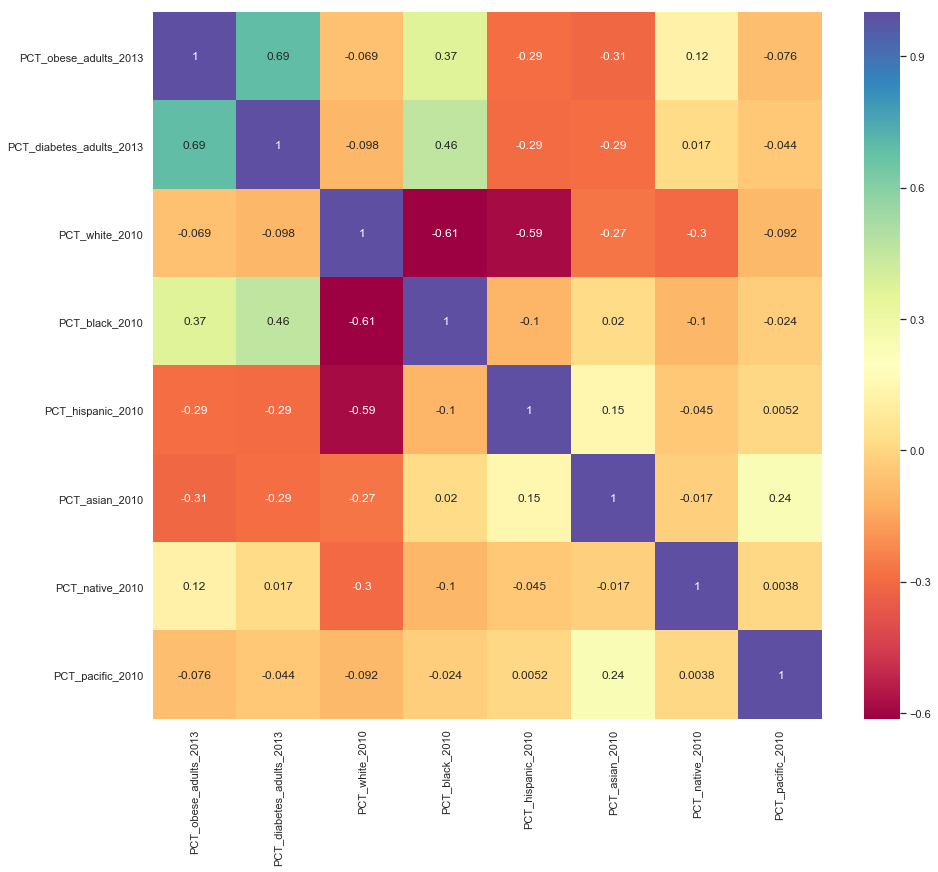

In [314]:
df = merge_to_base(df_health, df_ethnical)
draw_correlation_heatmap(df)

### Poverty & Income

In [212]:
df_poverty = pd.read_csv(os.path.join(path_output, 'poverty_data.csv'))
df_poverty.head()

fips   county state  PCT_poverty_rate_2015  PCT_poverty_rate_2015_children  \
0  1001  Autauga    AL                   12.7                            18.8   
1  1003  Baldwin    AL                   12.9                            19.6   
2  1005  Barbour    AL                   32.0                            45.2   
3  1007     Bibb    AL                   22.2                            29.3   
4  1009   Blount    AL                   14.7                            22.2   

   persistent_poverty_2010  persistent_child_poverty_2010  \
0                        0                              0   
1                        0                              0   
2                        1                              1   
3                        0                              1   
4                        0                              0   

   MEDIAN_houshold_income_2015  
0                      56580.0  
1                      52387.0  
2                      31433.0  
3                      40767.0  
4                      50487.0

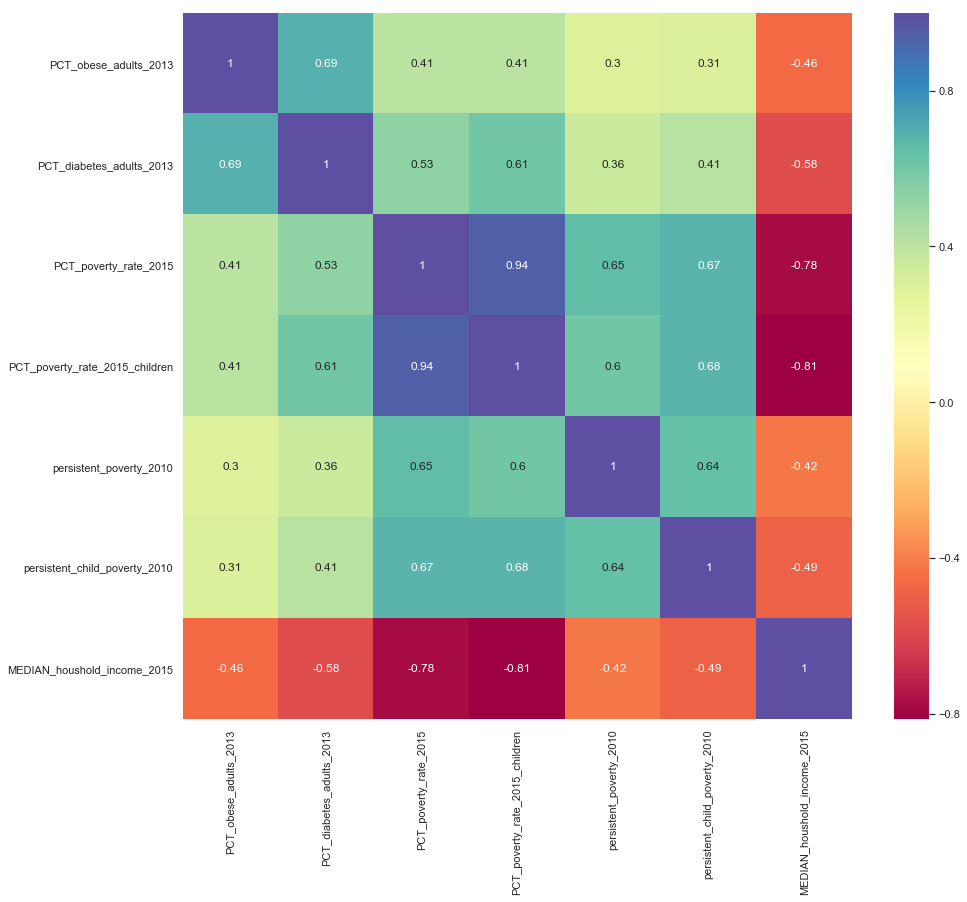

In [240]:
df = merge_to_base(df_health, df_poverty)
draw_correlation_heatmap(df)

### Population

In [225]:
df_population = pd.read_csv(os.path.join(path_output, 'population_data.csv'))
df_population.head()

fips   county state  CNT_population_2013  SQM_total_area_2000  \
0  1001  Autauga    AL                54792               604.45   
1  1003  Baldwin    AL               195147              2026.93   
2  1005  Barbour    AL                26938               904.52   
3  1007     Bibb    AL                22501               626.16   
4  1009   Blount    AL                57746               650.60   

   PSM_population_density_2013  metropolitain_area_2013  
0                    90.647696                        1  
1                    96.277128                        1  
2                    29.781542                        0  
3                    35.934905                        1  
4                    88.758069                        1

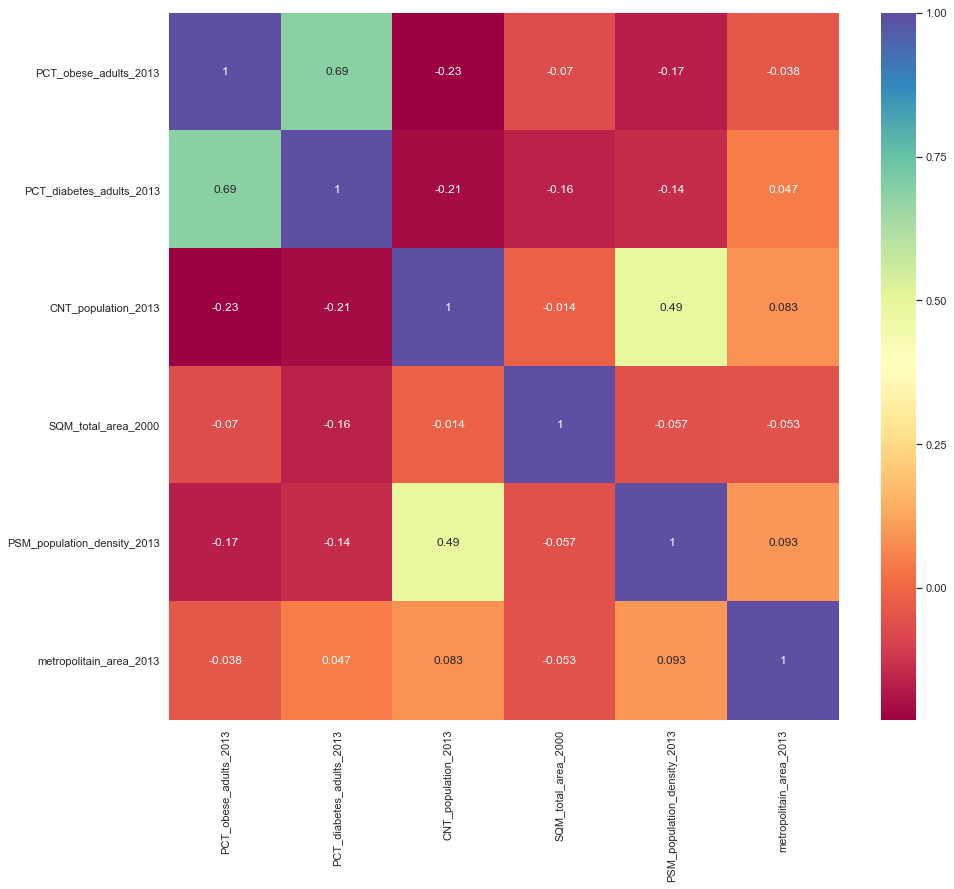

In [241]:
df = merge_to_base(df_health, df_population)
draw_correlation_heatmap(df)

### Fitness

In [232]:
df_fitness = pd.read_csv(os.path.join(path_output, 'fitness_data.csv'))
df_fitness.head()

fips   county state  CNT_fitness_facilities_2009  \
0  1001  Autauga    AL                            4   
1  1003  Baldwin    AL                           18   
2  1005  Barbour    AL                            1   
3  1007     Bibb    AL                            1   
4  1009   Blount    AL                            3   

   CNT_fitness_facilities_2014  CPT_fitness_facilities_2009  \
0                            5                     0.073889   
1                           25                     0.100331   
2                            0                     0.036157   
3                            1                     0.043590   
4                            3                     0.052319   

   CPT_fitness_facilities_2014  *CNT_fitness_facilities_2013  \
0                     0.090261                           5.0   
1                     0.124931                          24.0   
2                     0.000000                           0.0   
3                     0.044433                           1.0   
4                     0.051976                           3.0   

   *CPT_fitness_facilities_2013  
0                      0.086987  
1                      0.120011  
2                      0.007231  
3                      0.044264  
4                      0.052045

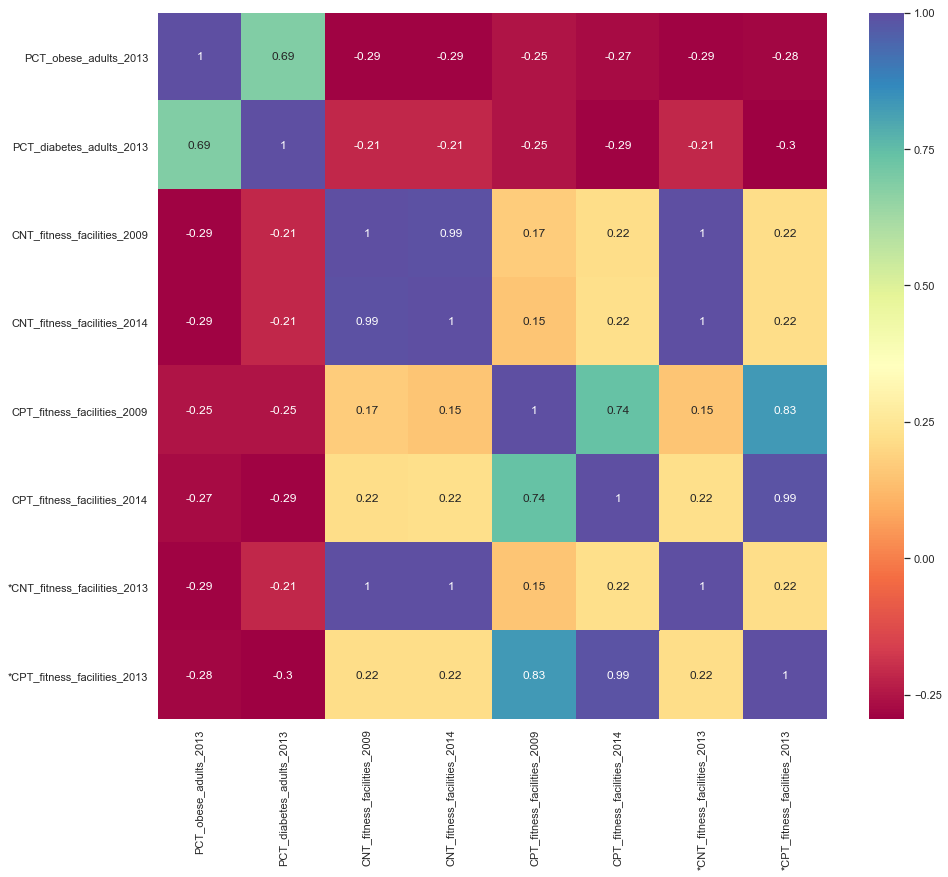

In [242]:
df = merge_to_base(df_health, df_fitness)
draw_correlation_heatmap(df)

### Store Access

In [246]:
df_access = pd.read_csv(os.path.join(path_output, 'store_access_data.csv'))
df_access.head()

fips   county state  PCT_low_access_fullPop_2010  \
0  1001  Autauga    AL                    33.769657   
1  1003  Baldwin    AL                    19.318473   
2  1005  Barbour    AL                    20.840972   
3  1007     Bibb    AL                     4.559753   
4  1009   Blount    AL                     2.700840   

   PCT_low_access_fullPop_2015  PCT_low_access_lowInc_2010  \
0                    32.062255                    9.793530   
1                    16.767489                    5.460261   
2                    22.105560                   11.420316   
3                     4.230324                    2.144661   
4                     6.497380                    1.062468   

   PCT_low_access_lowInc_2015  PCT_low_access_noCar_2010  \
0                   11.991125                   3.284786   
1                    5.424427                   2.147827   
2                   10.739667                   4.135869   
3                    2.601627                   3.458580   
4                    2.880150                   3.269380   

   PCT_low_access_noCar_2015  PCT_low_access_snap_2015  \
0                   3.351332                  4.608749   
1                   1.905114                  1.298900   
2                   4.329378                  4.303147   
3                   2.821427                  0.676710   
4                   3.336414                  0.812727   

   *PCT_low_access_fullPop_2013  *PCT_low_access_lowInc_2013  \
0                     32.403735                    11.551606   
1                     17.277686                     5.431593   
2                     21.852642                    10.875796   
3                      4.296210                     2.510234   
4                      5.738072                     2.516613   

   *PCT_low_access_noCar_2013  
0                    3.338022  
1                    1.953657  
2                    4.290676  
3                    2.948858  
4                    3.323007

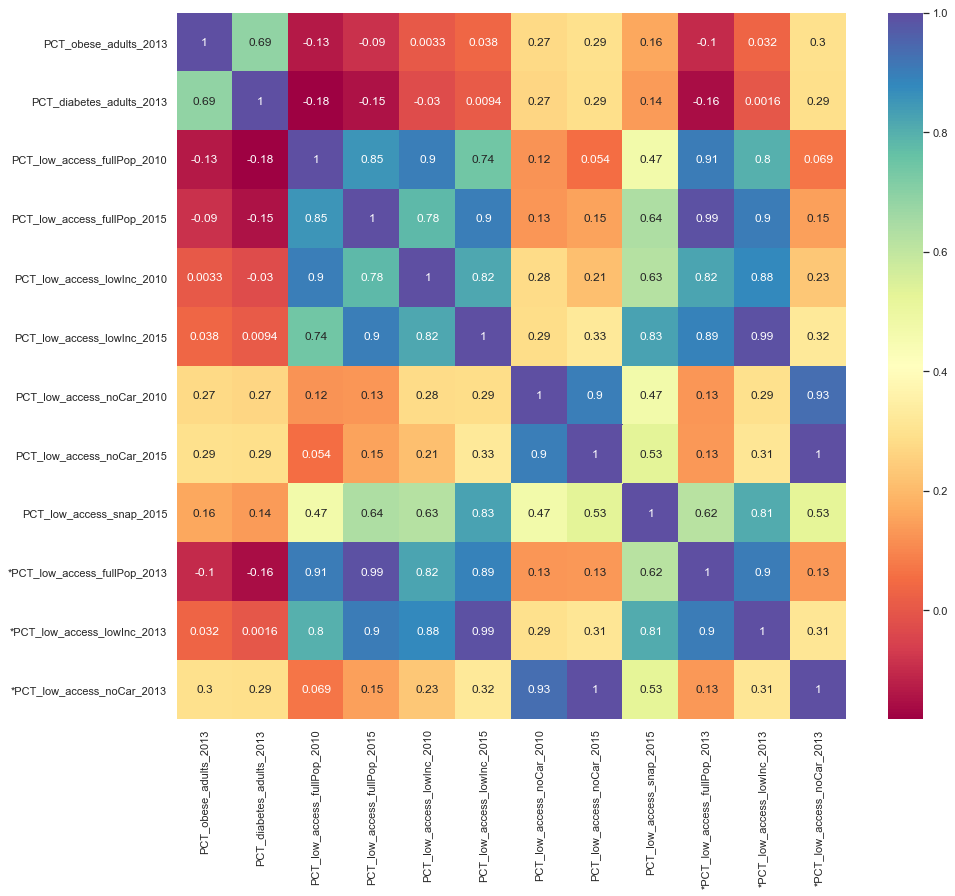

In [247]:
df = merge_to_base(df_health, df_access)
draw_correlation_heatmap(df)

### Age Groups

In [226]:
df_age = pd.read_csv(os.path.join(path_output, 'age_data.csv'))
df_age.head()

fips   county state  PCT_older_65_2010  PCT_younger_18_2010
0  1001  Autauga    AL          11.995382            26.777959
1  1003  Baldwin    AL          16.771185            22.987408
2  1005  Barbour    AL          14.236807            21.906982
3  1007     Bibb    AL          12.681650            22.696923
4  1009   Blount    AL          14.722096            24.608353

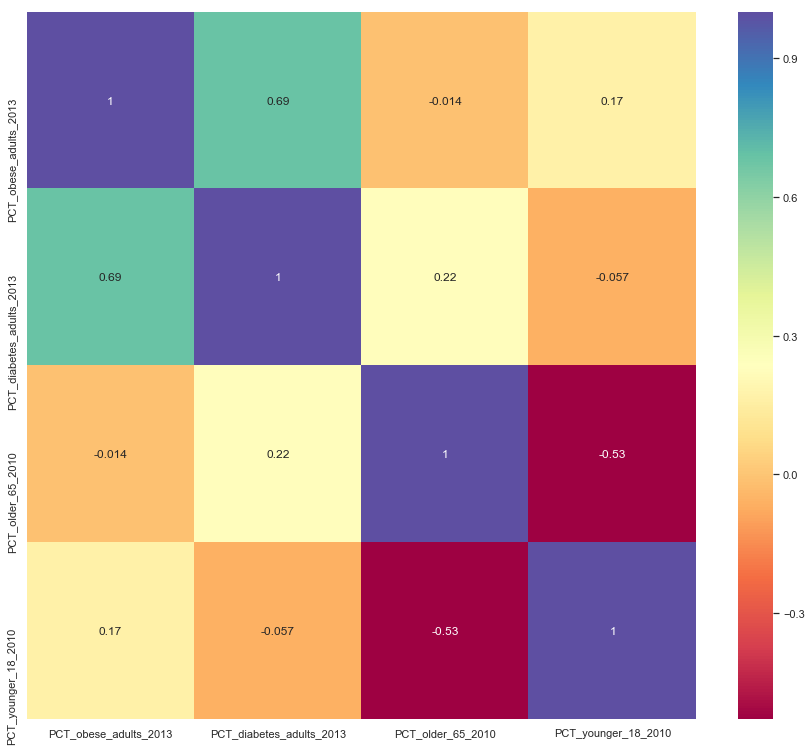

In [250]:
df = merge_to_base(df_health, df_age)
draw_correlation_heatmap(df)

# Linear Regression - Machine Learning

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
from sklearn.linear_model import LinearRegression

In [257]:
lm = LinearRegression()

In [262]:
df = df_health[['fips','county','state','PCT_obese_adults_2013']]
df = merge_to_base(df, df_poverty)
df = merge_to_base(df, df_age)
df = merge_to_base(df, df_ethnical)
df = merge_to_base(df, df_access)
df = merge_to_base(df, df_fitness)
df = df.drop(['fips','county','state'], axis=1)
df = df.dropna()

In [267]:
x = df.drop(['PCT_obese_adults_2013'], axis=1)
y = df['PCT_obese_adults_2013']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=120)
lm.fit(x_train, y_train)
df_coefficients = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficients'])
df_coefficients.head()

Coefficients
PCT_poverty_rate_2015               0.154901
PCT_poverty_rate_2015_children     -0.173646
persistent_poverty_2010             0.336855
persistent_child_poverty_2010       0.188034
MEDIAN_houshold_income_2015        -0.000162

In [268]:
predictions = lm.predict(x_test)
predictions

array([37.79506679, 35.89187596, 32.37860718, ..., 30.0148309 ,
       28.74774393, 29.87624993])

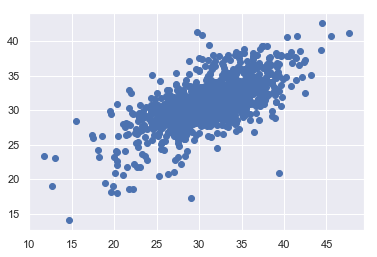

In [269]:
plt.scatter(y_test, predictions)

In [286]:
print(len(y_test))

1248


In [288]:
print(len(predictions))

1248


In [297]:
matrix = np.array([y_test,predictions]).transpose()
df_verify = pd.DataFrame(matrix, columns=['test','predict'])
df_verify.head()

test    predict
0  32.4  37.795067
1  29.7  35.891876
2  30.6  32.378607
3  31.8  31.951623
4  34.8  32.021733

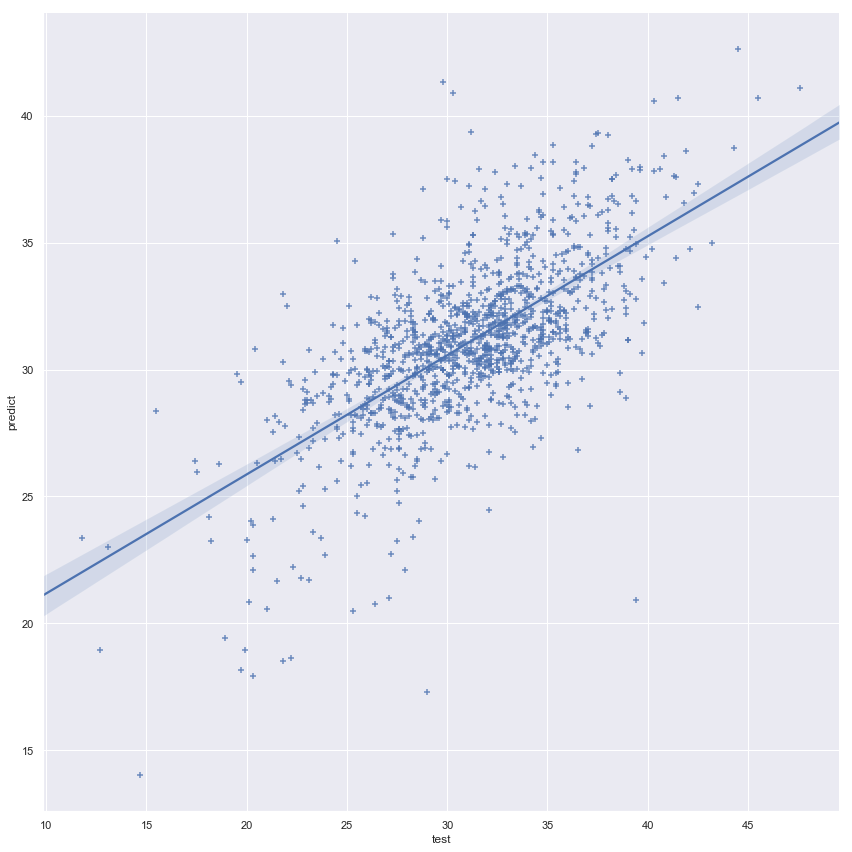

In [303]:
sns.lmplot(x='test', y='predict', data=df_verify, size=12, markers='+')